In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Stage 1 （100 samples in stage 1 + 110 Normal）

In [9]:
# Data from different random seeds
results_seed_42 = np.array([
    [0.39, 0.35, 0.46],
    [0.47, 0.48, 0.59],
    [0.23, 0.17, 0.26],
    [0.46, 0.49, 0.53],
    [0.37, 0.45, 0.46],
])

results_seed_425 = np.array([
    [0.39, 0.48, 0.48],
    [0.39, 0.45, 0.47],
    [0.44, 0.48, 0.49],
    [0.20, 0.34, 0.39],
    [0.45, 0.47, 0.48],
])

results_seed_507 = np.array([
    [0.18, 0.37, 0.45],
    [0.40, 0.34, 0.43],
    [0.20, 0.28, 0.25],
    [0.40, 0.46, 0.46],
    [0.55, 0.62, 0.64],
])

results_seed_210 = np.array([
    [0.41, 0.39, 0.41],
    [0.37, 0.30, 0.43],
    [0.37, 0.38, 0.49],
    [0.51, 0.58, 0.61],
    [0.19, 0.30, 0.31],
])

# Combine results from all seeds
all_results = np.array([results_seed_42, results_seed_425, results_seed_507, results_seed_210])


In [10]:
mean_values = np.mean(all_results, axis=0)
std_values = np.std(all_results, axis=0)
# Fold indices
folds = np.arange(1, 6)

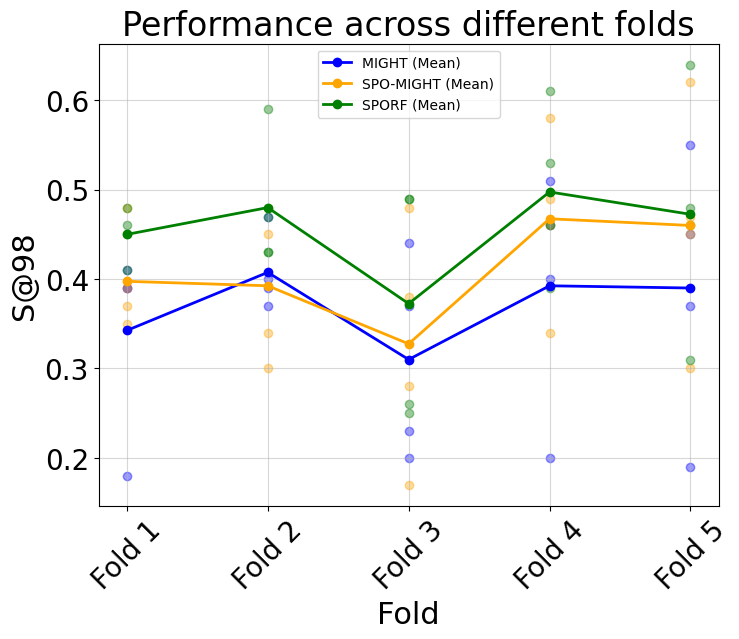

In [11]:
# Plot the results
plt.figure(figsize=(8, 6))

methods = ["MIGHT", "SPO-MIGHT", "SPORF"]
colors = ["blue", "orange", "green"]

for i, method in enumerate(methods):
    # Scatter plot for each seed
    for seed_results in all_results:
        plt.scatter(folds, seed_results[:, i], color=colors[i], alpha=0.4, label=f"{method} (Seed)" if seed_results is all_results[0] else "")

    # Plot mean line
    plt.plot(folds, mean_values[:, i], color=colors[i], marker="o", label=f"{method} (Mean)", linewidth=2)

plt.xlabel("Fold", fontsize=22)
plt.ylabel("S@98", fontsize=22)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.title("Performance across different folds", fontsize=24)
plt.xticks(folds, labels=[f"Fold {i}" for i in folds])
plt.legend()
plt.grid(alpha=0.5)

# Show the plot
plt.show()

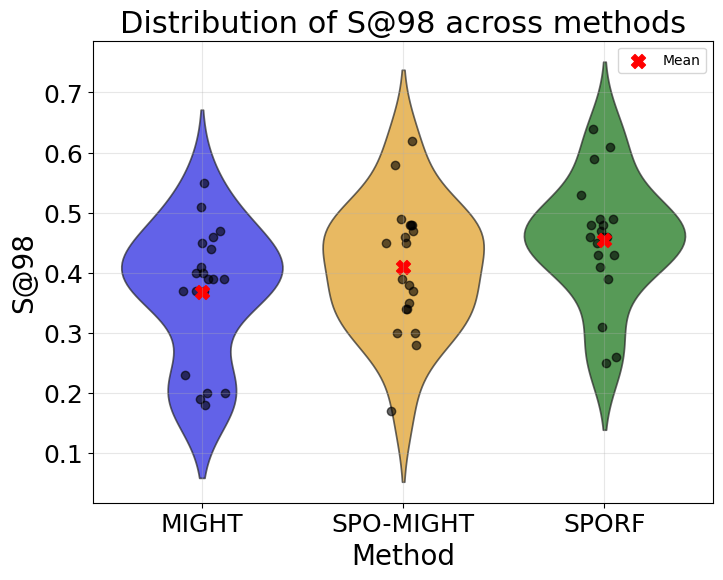

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data from different random seeds
results_seed_42 = np.array([
    [0.39, 0.35, 0.46],
    [0.47, 0.48, 0.59],
    [0.23, 0.17, 0.26],
    [0.46, 0.49, 0.53],
    [0.37, 0.45, 0.46],
])

results_seed_425 = np.array([
    [0.39, 0.48, 0.48],
    [0.39, 0.45, 0.47],
    [0.44, 0.48, 0.49],
    [0.20, 0.34, 0.39],
    [0.45, 0.47, 0.48],
])

results_seed_507 = np.array([
    [0.18, 0.37, 0.45],
    [0.40, 0.34, 0.43],
    [0.20, 0.28, 0.25],
    [0.40, 0.46, 0.46],
    [0.55, 0.62, 0.64],
])
results_seed_210 = np.array([
    [0.41, 0.39, 0.41],
    [0.37, 0.30, 0.43],
    [0.37, 0.38, 0.49],
    [0.51, 0.58, 0.61],
    [0.19, 0.30, 0.31],
])

# Combine results from all seeds
all_results = np.vstack([results_seed_42, results_seed_425, results_seed_507, results_seed_210])

# Convert to list format for violinplot
data_violin = [all_results[:, i] for i in range(3)]
methods = ["MIGHT", "SPO-MIGHT", "SPORF"]

# Create figure
plt.figure(figsize=(8, 6))

# Create violin plot
sns.violinplot(data=data_violin, inner=None, palette=["blue", "orange", "green"], alpha=0.7)

# Overlay individual data points
for i in range(3):
    jitter = np.random.normal(0, 0.05, size=all_results.shape[0])  # Jitter to spread points
    plt.scatter(np.full(all_results.shape[0], i) + jitter, all_results[:, i], color="black", alpha=0.6)

# Compute means
means = np.mean(all_results, axis=0)

# Add mean markers
for i in range(3):
    plt.scatter(i, means[i], color="red", marker="X", s=100, label="Mean" if i == 0 else "")

# Labels and titles
plt.xticks(range(3), methods, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Method", fontsize=20)
plt.ylabel("S@98", fontsize=20)
plt.title("Distribution of S@98 across methods", fontsize=22)
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()

# Scaling Laws

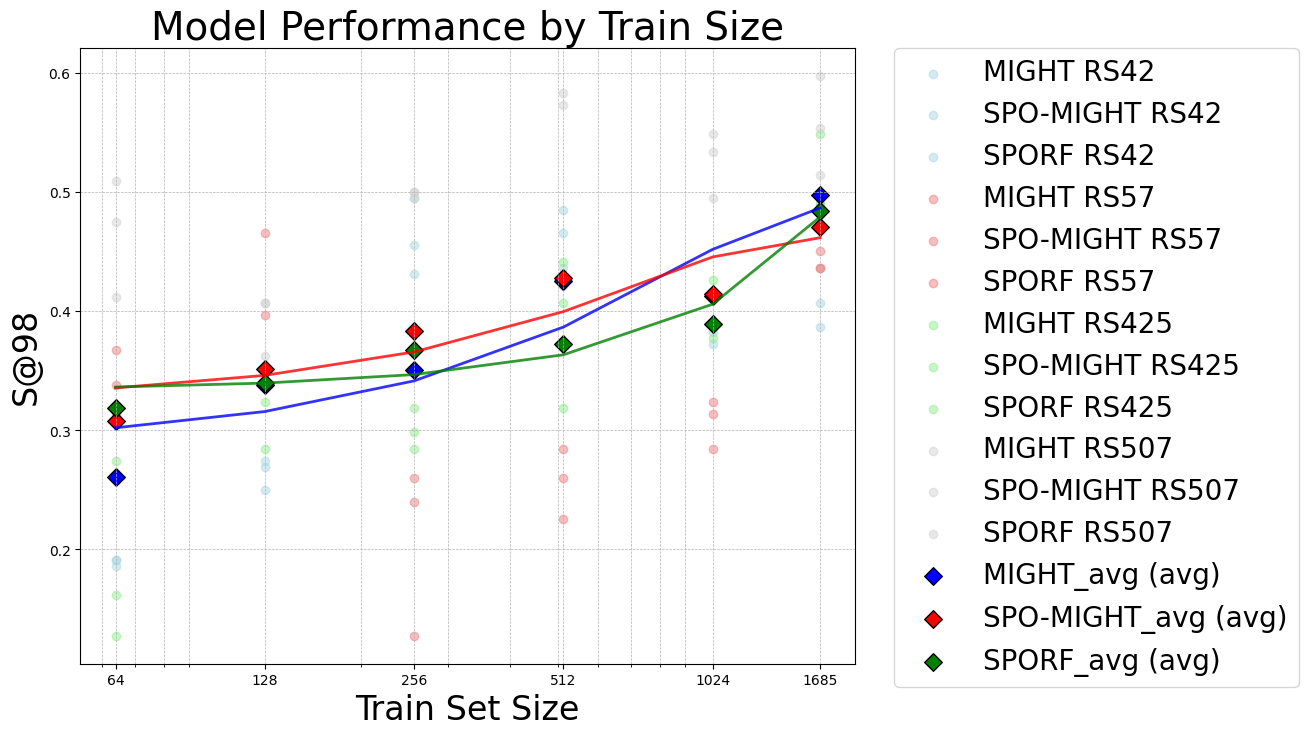

In [15]:
# Load the data
data = {
    "Train Size": [64, 128, 256, 512, 1024, 1685],
    
    # Random State 42
    "MIGHT_42": [0.1912, 0.2696, 0.4559, 0.4853, 0.3922, 0.4069],
    "SPO-MIGHT_42": [0.1912, 0.2500, 0.4951, 0.4363, 0.3824, 0.3873],
    "SPORF_42": [0.1863, 0.2745, 0.4314, 0.4657, 0.3725, 0.4902],
    
    # Random State 57
    "MIGHT_57": [0.3137, 0.3971, 0.1275, 0.2255, 0.2843, 0.4363],
    "SPO-MIGHT_57": [0.3676, 0.4657, 0.2402, 0.2598, 0.3235, 0.4510],
    "SPORF_57": [0.3382, 0.3382, 0.2598, 0.2843, 0.3137, 0.4363],
    
    # Random State 425
    "MIGHT_425": [0.1275, 0.3235, 0.3186, 0.4069, 0.4265, 0.5490],
    "SPO-MIGHT_425": [0.1618, 0.2843, 0.2990, 0.4412, 0.4167, 0.4902],
    "SPORF_425": [0.2745, 0.3382, 0.2843, 0.3186, 0.3775, 0.4951],
    
    # Random State 507
    "MIGHT_507": [0.4118, 0.3627, 0.5000, 0.5833, 0.5490, 0.5980],
    "SPO-MIGHT_507": [0.5098, 0.4069, 0.5000, 0.5735, 0.5343, 0.5539],
    "SPORF_507": [0.4755, 0.4069, 0.4951, 0.4216, 0.4951, 0.5147],
}

df = pd.DataFrame(data)

# Calculate average values for each model
df["MIGHT_avg"] = df[["MIGHT_42", "MIGHT_57", "MIGHT_425", "MIGHT_507"]].mean(axis=1)
df["SPO-MIGHT_avg"] = df[["SPO-MIGHT_42", "SPO-MIGHT_57", "SPO-MIGHT_425", "SPO-MIGHT_507"]].mean(axis=1)
df["SPORF_avg"] = df[["SPORF_42", "SPORF_57", "SPORF_425", "SPORF_507"]].mean(axis=1)

# Set colors for each model
random_colors = ["lightblue", "lightcoral", "lightgreen", "lightgray"]  # Original colors
avg_colors = {"MIGHT_avg": "blue", "SPO-MIGHT_avg": "red", "SPORF_avg": "green"}  # Average colors

# Plot the results
plt.figure(figsize=(10, 8))

# Draw scatter plots for each random state
random_state_keys = ["42", "57", "425", "507"]
plotted_labels = set()

for idx, random_state in enumerate(random_state_keys):
    for model in ["MIGHT", "SPO-MIGHT", "SPORF"]:
        col_name = f"{model}_{random_state}"
        label = f"{model} RS{random_state}" if col_name not in plotted_labels else None
        plt.scatter(df["Train Size"], df[col_name], color=random_colors[idx], alpha=0.5, marker="o", label=label)
        plotted_labels.add(col_name)
        
for model in ["MIGHT_avg", "SPO-MIGHT_avg", "SPORF_avg"]:
    plt.scatter(df["Train Size"], df[model], label=f"{model} (avg)", color=avg_colors[model], alpha=1.0, marker="D", edgecolors="black", s=80)  # 菱形点

    # Fit a polynomial to the average values
    z = np.polyfit(df["Train Size"], df[model], 2)
    p = np.poly1d(z)
    plt.plot(df["Train Size"], p(df["Train Size"]), color=avg_colors[model], alpha=0.8, linewidth=2)


# Set plot properties
plt.xscale("log")  
plt.xticks(df["Train Size"], labels=df["Train Size"])  
plt.xlabel("Train Set Size", fontsize=24)
plt.ylabel("S@98", fontsize=24)
plt.title("Model Performance by Train Size", fontsize=28)

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=20)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()